<a href="https://colab.research.google.com/github/giovanirojascuela/2025_5TO01/blob/main/TALLER/EXPOSICION/REGRESION_LINEAL_SIMPLE_EMERSON_VILCA_CALCINA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#  PASO 1: Instalar e importar librerías necesarias

import pandas as pd
#Sirve para cargar y manipular datos en forma de tablas (DataFrames)

import matplotlib.pyplot as plt
#Esta librería permite crear gráficos, como líneas de tendencia o gráficos de dispersión.
# Nos ayuda a visualizar la relación entre el área y el precio de una vivienda.

from sklearn.linear_model import LinearRegression
#Importamos el modelo de regresión lineal desde la librería scikit-learn.
#Esto nos permite entrenar el modelo y hacer predicciones.

from sklearn.metrics import mean_squared_error, r2_score
#Estas funciones nos permiten evaluar qué tan bueno es el modelo.

from sklearn.model_selection import train_test_split
#Sirve para dividir el dataset en dos partes:
#Entrenamiento (donde el modelo aprende)
#Prueba (donde lo evaluamos con datos que no ha visto antes)


In [ ]:
#  PASO 2: Cargar dataset
# Usaremos un dataset público y simple desde GitHub

url = "https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv"
#Aquí estamos leyendo ese archivo y cargándolo en un DataFrame llamado df.
#Un DataFrame es como una tabla que permite ver y trabajar con los datos fácilmente
df = pd.read_csv(url)

# Mostrar las primeras filas del dataset
df.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
# PASO 3: Preparar los datos para el modelo
# Usaremos "median_income" (ingreso medio) para predecir "median_house_value" (precio medio)

X = df[["median_income"]]
y = df["median_house_value"]

# Dividir en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# PASO 4: Crear y entrenar el modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(X_train, y_train)


LinearRegression()

In [ ]:
# PASO 5: Realizar predicciones con los datos de prueba
#Ahora que el modelo está entrenado, usamos los datos de prueba (X_test) para hacer predicciones.
#El resultado es un conjunto de valores
# estimados de precios de vivienda que se compararán con los precios reales.
y_pred = modelo.predict(X_test)


In [ ]:
# 📌 PASO 6: Evaluar el modelo
#Coeficiente (pendiente): Indica cuánto varía el
#precio de la vivienda por cada unidad adicional de ingreso.
print("📈 Coeficiente (pendiente):", modelo.coef_[0])

#Intercepto: Es el valor base cuando el ingreso es cero.
print("📊 Intercepto:", modelo.intercept_)

#R² Score: Mide qué tan bien el modelo explica la variabilidad de los datos.
print("✅ R² Score (precisión):", r2_score(y_test, y_pred))

#MSE: Promedio del error al cuadrado; cuanto más bajo, mejor es la predicción.
print("❌ Error cuadrático medio (MSE):", mean_squared_error(y_test, y_pred))


📈 Coeficiente (pendiente): 41933.84939381272
📊 Intercepto: 44459.72916907875
✅ R² Score (precisión): 0.45885918903846656
❌ Error cuadrático medio (MSE): 7091157771.76555


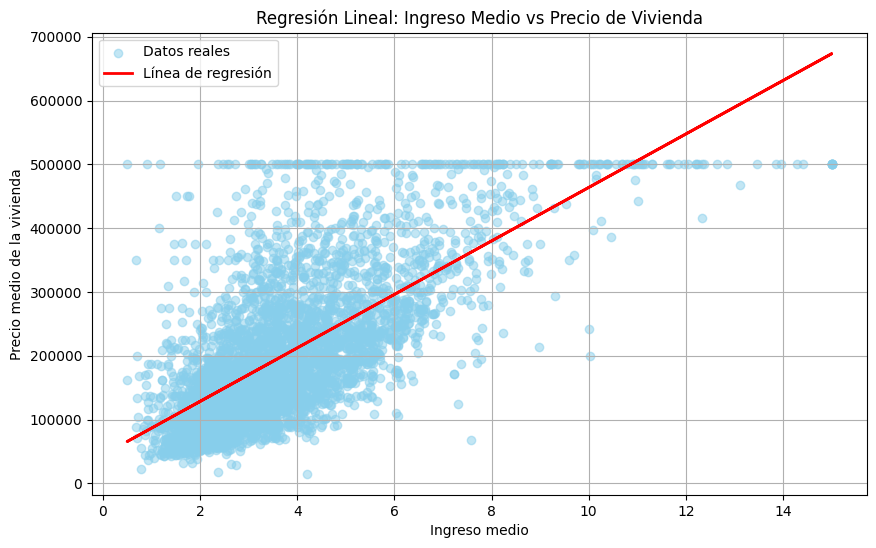

In [ ]:
# 📌 PASO 7: Visualización de la regresión lineal
plt.figure(figsize=(10,6))
plt.scatter(X_test, y_test, color="skyblue", label="Datos reales", alpha=0.5)
plt.plot(X_test, y_pred, color="red", linewidth=2, label="Línea de regresión")
plt.title("Regresión Lineal: Ingreso Medio vs Precio de Vivienda")
plt.xlabel("Ingreso medio")
plt.ylabel("Precio medio de la vivienda")
plt.legend()
plt.grid(True)
plt.show()
